# **Introduction**

Breast cancer is a pervasive and life-threatening disease that affects millions of women worldwide. Early detection and accurate diagnosis are critical for effective treatment and improving survival rates. However, the complexity of the disease and variability in patient responses pose significant challenges in diagnosis and treatment planning. In recent years, machine learning has emerged as a powerful tool for aiding medical professionals in making more informed decisions by analyzing complex patterns in medical data.

In this project, I aim to leverage machine learning techniques to develop a predictive model for breast cancer diagnosis. By using a dataset containing features extracted from digitized images of fine needle aspirate (FNA) biopsies, we seek to classify tumors as benign or malignant based on their characteristics. This model can potentially assist healthcare professionals in making quicker and more accurate diagnoses, ultimately leading to better patient outcomes.

# **Problem Statement**

The primary problem I am trying to solve is the accurate classification of breast tumors as benign or malignant based on various attributes extracted from biopsy images. This involves analyzing a set of features such as cell size, shape, texture, and other morphological characteristics to determine the likelihood of cancer. The challenge lies in developing a model that can effectively capture the complex relationships between these features and the diagnosis, while also being robust and generalizable to new cases.

# **Reason for Choosing this Dataset:**

I chose the Breast Cancer Wisconsin (Diagnostic) dataset from Kaggle for these reasons: https://www.kaggle.com/datasets/imtkaggleteam/breast-cancer


1. **Relevance:** The Breast Cancer Wisconsin (Diagnostic) dataset is directly aligned with our objective of leveraging machine learning to enhance the diagnostic accuracy of breast cancer. The dataset's focus on features derived from fine needle aspirate (FNA) biopsies makes it particularly relevant, as these biopsies are a common method used in the clinical evaluation of breast lumps. By developing a model that can accurately classify these biopsy samples, we aim to provide a tool that can support medical professionals in making more informed decisions, leading to earlier detection and treatment of breast cancer.

2. **Quality:** This dataset is renowned for its high quality, which is crucial for developing reliable machine learning models. The data has been meticulously collected and curated, with each feature being carefully measured and documented. This attention to detail ensures that the dataset is free from errors and inconsistencies that could otherwise compromise the accuracy of the predictive models. Furthermore, the dataset's documentation provides clear descriptions of the features and their clinical significance, aiding in the interpretation of the model's predictions.

3. **Feature Richness:** The dataset comprises 30 real-valued features, each quantifying a different aspect of the cell nuclei present in the biopsy images. These features include measurements of size, shape, texture, and other morphological characteristics. The richness of these features allows for a comprehensive analysis of the tumor cells, enabling the development of sophisticated models that can capture the complex patterns associated with malignancy. This comprehensive set of attributes provides a solid foundation for identifying the key factors that differentiate benign from malignant tumors.
4. **Size:** With 569 instances, the dataset strikes a balance between being large enough to train effective machine learning models and small enough to be manageable in terms of computational resources. This size ensures that there is sufficient data to capture the variability in breast tumor characteristics while allowing for efficient model training and validation. The dataset's size also facilitates the use of a variety of machine learning techniques, from traditional algorithms to more advanced methods like deep learning, providing flexibility in model development.

5. **Impact:** Working with the Breast Cancer Wisconsin (Diagnostic) dataset presents an opportunity to make a meaningful contribution to the field of medical diagnosis. By developing a model that can accurately classify breast tumors, we have the potential to improve the diagnostic process, leading to earlier detection and treatment of breast cancer. This can have a significant impact on patient outcomes, as early-stage cancers are generally more treatable and have better survival rates. Additionally, the insights gained from this project could be applied to other areas of medical imaging and diagnosis, further extending its impact.

# **Target Variable & Features of the Dataset**

**Target Variable:**
- **Diagnosis:** The classification of the tumor as either benign (B) or malignant (M).

**Fatures:**
- **Radius:** Mean of distances from the center to points on the perimeter of the cell nuclei.

- **Texture:** Standard deviation of gray-scale values in the cell nuclei.

- **Perimeter:** Mean size of the core tumor.

- **Area:** Area of the cell nuclei.

- **Smoothness:** Local variation in radius lengths of the cell nuclei.

- **Compactness:** Perimeter^2 / area - 1.0.

- **Concavity:** Severity of concave portions of the contour of the cell nuclei.

- **Concave Points:** Number of concave portions of the contour of the cell nuclei.

- **Symmetry:** Symmetry of the cell nuclei.

- **Fractal Dimension:** "Coastline approximation" - 1 (a measure of the "roughness" or complexity of the cell nuclei).

<br>

These features are computed for each cell nucleus and are used to describe the characteristics of the cell nuclei present in the biopsy images. Additionally, for each of these features, the dataset includes three different measurements:

- **Mean:** The average of the feature across all cell nuclei in the image.
- **Standard Error:** The standard error of the feature across all cell nuclei in the image.
- **Worst:** The worst or largest value of the feature across all cell nuclei in the image.

This results in a total of 30 features (10 features x 3 measurements) used for classification in the dataset.

# **Import Necessary Libraries**

In [1]:
# Basic data manipulation and numerical libraries
import pandas as pd
import numpy as np

# Visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns

# Machine learning utilities and metrics
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# Imbalanced dataset handling
from imblearn.over_sampling import SMOTE

# Deep learning libraries from TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import RMSprop
from keras import models
from keras import layers
from keras import regularizers
from keras.callbacks import EarlyStopping


# Utilities for handling iterators
import itertools

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


# **Setting Seed for Reproducibility**

In [2]:
# Set the seed for reproducibility
SEED = 42

# Set the seed for TensorFlow to ensure consistent results in deep learning models
tf.random.set_seed(SEED)

# Set the seed for NumPy to ensure consistent results in random operations
np.random.seed(SEED)


# **Load the Dataset**

In [3]:
# Import dataset from my github

!git clone https://github.com/kevinrt001/Machine-Learning.git

Cloning into 'Machine-Learning'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (9/9), 2.40 MiB | 1.28 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [4]:
# Check if dataset is present

!ls Machine-Learning/breast-cancer-wisconsin-data_data.csv

Machine-Learning/breast-cancer-wisconsin-data_data.csv


In [5]:
# Load the CSV file into a Pandas DataFrame

df = pd.read_csv('Machine-Learning/breast-cancer-wisconsin-data_data.csv')

In [6]:
# Display first 5 rows from dataset

df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


# **Clean & Preprocess the Data**

In [7]:
# Drop the 'Unnamed: 32' and 'id' columns as they are not relevant for analysis

df = df.drop(columns=['Unnamed: 32', 'id'])

In [8]:
# Display the summary information of the DataFrame, including data types and non-null counts

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
# Generate descriptive statistics that summarize the central tendency, dispersion, and shape of the dataset's distribution

df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [10]:
# Count the number of missing values in each column of the DataFrame

df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
# Count the number of duplicated rows in the DataFrame

df.duplicated().sum()

0

In [12]:
# Get the dimensions of the DataFrame, showing the number of rows and columns

df.shape

(569, 31)

**Dataset Summary:**

 - I remove the **'Unnamed: 32'** and **'id'** columns from the dataset as they are features not relevant to the diagnosis of breast cancer

 - The dataset does not have any null values, which is ideal for machine learning purposes.

- There are no missing values in the dataset (0 non-null count for all columns).

- There are no duplicated rows in the dataset (df.duplicated().sum() = 0).

- The cleaned dataset has 569 entries and 31 columns. The columns consist of one object type column (diagnosis) and 30 float64 type columns representing various features related to the breast cancer diagnosis.

# **Preparing the Data**

In [13]:
# Separate features and target

X = df.drop(['diagnosis'], axis=1)
y = df['diagnosis'].map({'M': 1, 'B': 0})  # Convert labels to binary (Malignant: 1, Benign: 0)]

print("Shape of X:", X.shape)
print("Shape of y:", y.shape, '\n')
print("First few rows of X:\n")
print(X.head(), '\n')
print("\nFirst few rows of y:\n")
print(y.head(), '\n')
print("Unique values in y:", y.unique())

Shape of X: (569, 30)
Shape of y: (569,) 

First few rows of X:

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  

In [14]:
# Split the data into training, validation and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42, stratify=y_train, shuffle=True)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (409, 30)
Shape of y_train: (409,)
Shape of X_val: (46, 30)
Shape of y_val: (46,)
Shape of X_test: (114, 30)
Shape of y_test: (114,)


In [15]:
# Standardize the features

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


# Check the mean and standard deviation of the scaled features in the training set
print("Mean of scaled features in the training set:")
print(X_train.mean())
print("\nStandard deviation of scaled features in the training set:")
print(X_train.std())

print("\nMean of scaled features in the validation set:")
print(X_val.mean())
print("\nStandard deviation of scaled features in the validation set:")
print(X_val.std())

# Check the mean and standard deviation of the scaled features in the test set
print("\nMean of scaled features in the test set:")
print(X_test.mean())
print("\nStandard deviation of scaled features in the test set:")
print(X_test.std())

Mean of scaled features in the training set:
-3.271855303214805e-17

Standard deviation of scaled features in the training set:
1.0

Mean of scaled features in the validation set:
-0.005146084407433257

Standard deviation of scaled features in the validation set:
0.9288120994041225

Mean of scaled features in the test set:
-0.024425817563766904

Standard deviation of scaled features in the test set:
0.9253999573146731


**Dataset Preparation Summary:**

- The 'diagnosis' column was dropped from the DataFrame to create the feature set X, while the 'diagnosis' column was mapped to binary labels ('M': 1 for malignant, 'B': 0 for benign) to create the target variable y.

- The dataset was then split into training and test sets using the train_test_split function, with 20% of the data allocated for testing and the class distribution preserved using the stratify parameter.

- The training set was further split into training and validation sets using the same function, with 10% of the training data used for validation. The class distribution was again preserved in this split.

- Finally, StandardScaler was used to standardize the features in the training, validation, and test sets, ensuring that the data was ready for use in machine learning algorithms.
The mean and standard deviation of the scaled features are approximately 0 and 1. Therefore, features have been correctly standardized.

# **Create a Baseline model**

In [33]:
# Create a baseline model using the most frequent strategy
baseline_model = DummyClassifier(strategy='most_frequent', random_state=42)

# Fit the baseline model on the training data
baseline_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_baseline = baseline_model.predict(X_test)

# Evaluate the baseline model
baseline_accuracy = accuracy_score(y_test, y_pred_baseline)
print("Baseline Model Accuracy:", baseline_accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline))


Baseline Model Accuracy: 0.631578947368421

Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77        72
           1       0.00      0.00      0.00        42

    accuracy                           0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114




I have created a **Baseline Model** using the **'most frequent strategy'**, which predicts the most frequent class in the training data for all instances.

In this case, the most frequent class is 'benign' (0). The baseline model achieved an accuracy of 0.6316 on the test data, indicating that it correctly predicted the most frequent class for **63.16%** of the instances.

However, the precision, recall, and F1-score for the 'malignant' class (1) are all 0, indicating that the model performed poorly in predicting the minority class. The classification report shows a low F1-score for the 'malignant' class, highlighting the model's inability to effectively identify instances of malignant breast cancer.

Overall, the baseline model serves as a starting point for comparison with more sophisticated models, showing the need for improved performance, especially in predicting the minority class.

# **Neural Network Model Creation and Training**

  This section of code defines two functions for creating and training a deep neural network model for classification tasks

In [17]:
def create_model(name=None, input_shape=30, output_shape=1, hidden_layers=0, hidden_neurons=np.nan, activation=None,
                 dropout=np.nan, optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'],
                 regularizer=None):
    """
    Creates a deep neural network model for classification tasks with customizable parameters.

    Parameters:
    - name: String or None representing the name of the model.
    - input_shape: Integer representing the dimension of the input features.
    - output_shape: Integer representing the number of output classes.
    - hidden_layers: Integer representing the number of hidden layers in the network.
    - hidden_neurons: Integer or NaN representing the number of neurons in each hidden layer.
    - activation: String or None representing the activation function to use in hidden layers.
    - dropout: Float or NaN representing the dropout rate for regularization.
    - optimizer: String representing the optimizer to use for training.
    - loss: String representing the loss function to use for training.
    - metrics: List of strings representing the metrics to evaluate during training.
    - regularizer: Regularizer instance (e.g., l1, l2) or None for layer weights.


    Returns:
    - A compiled Keras model.
    """
    model = models.Sequential(name=name)

    # Input layer
    model.add(layers.Input(shape=(input_shape,)))

    # Hidden layers
    for _ in range(hidden_layers):
        if not np.isnan(hidden_neurons):
            model.add(layers.Dense(hidden_neurons, activation=activation,
                                   kernel_regularizer=regularizer))
        if not np.isnan(dropout):
            model.add(layers.Dropout(dropout))

    # Output layer
    model.add(layers.Dense(output_shape, activation='sigmoid' if output_shape == 1 else 'softmax'))

    # Compile model
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

    return model

In [18]:
def train_model(model, X_train, y_train, class_weights, batch_size=32, epochs=100,
                val_data=None, callbacks=[], seed=42, normalize=False, verbose=1):
    """
    Trains the deep neural network model with specified parameters and optional data normalization.

    Parameters:
    - model: The compiled Keras model to train.
    - X_train: Numpy array containing the training data.
    - y_train: Numpy array containing the labels for the training data.
    - class_weights: Dictionary representing the weights for each class for handling imbalanced data.
    - batch_size: Integer representing the batch size for training.
    - epochs: Integer representing the number of epochs to train the model.
    - val_data: Tuple (X_val, y_val) representing the validation data. If None, a portion of the training data will be used for validation.
    - callbacks: List of Keras callbacks to be applied during training.
    - seed: Integer representing the random seed for reproducibility.
    - normalize: Boolean indicating whether to normalize the input data using StandardScaler.
    - verbose: Integer (0, 1, or 2). Verbosity mode. 0 = silent, 1 = progress bar, 2 = one line per epoch.

    Returns:
    - The history object containing training and validation loss and accuracy for each epoch.
    """
    # np.random.seed(seed)
    # tf.random.set_seed(seed)

    # # Splitting the data into training and validation sets if val_data is not provided
    # if val_data is None:
    #     X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True,
    #                                                       stratify=y)
    #     val_data = (X_val, y_val)


    # Train the model
    history = model.fit(
        X_train, y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=val_data,
        class_weight=class_weights,
        callbacks=callbacks,
        verbose=verbose
    )

    # Evaluate the model
    evaluation = model.evaluate(val_data[0], val_data[1], verbose=0)

    results = {
        'model': model,
        'evaluation': evaluation,
        'history': history
    }

    return results

# **Create a Underfit Model That Performs Better Than The Baseline Model**

- My underfit_model is a straightforward neural network designed to address the limitations of the baseline model. It consists of a single layer with no hidden neurons, making it a linear model. This simplicity allows it to capture some of the underlying patterns in the data that the baseline model might miss.

- The model's input shape is 30, matching the number of features in the dataset, and its output shape is 1 for binary classification. Unlike more complex models, the underfit_model does not include additional components such as hidden layers, activation functions, dropout rates, or regularizers.

- Instead, it uses the 'rmsprop' optimizer and 'binary_crossentropy' loss function, which are suitable for binary classification tasks.

- The model's evaluation metrics focus on accuracy, precision, recall, and AUC, providing a comprehensive assessment of its performance.

Overall, the underfit_model strikes a balance between simplicity and effectiveness, aiming to outperform the baseline model while avoiding overfitting.

In [26]:
# Define the configuration for creating the Underfit deep learning model

# - input_shape: The number of features in the input data.
# - output_shape: The number of output classes (1 for binary classification).
# - optimizer: The optimization algorithm to use for minimizing the loss function during training.
# - loss_function: The loss function to be used for evaluating the model's performance.
# - metrics: A list of metrics to be evaluated by the model during training and testing, including accuracy, precision, recall, and area under the ROC curve (AUC).

name = "underfit_model"
input_shape = 30
output_shape = 1
hidden_layers = 0
hidden_neurons = np.nan
activation = None
dropout = np.nan
optimizer = 'rmsprop'
loss_function = 'binary_crossentropy'
regularizer = None
metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]




In [27]:
# Create an underfitting model with minimal complexity

# - name: The name assigned to the model (underfit_model).
# - input_shape: The number of input features (30 in this case).
# - output_shape: The number of output classes (1 for binary classification).
# - hidden_layers: The number of hidden layers in the model (0 for a simple model).
# - hidden_neurons: The number of neurons in each hidden layer (not applicable here as there are no hidden layers).
# - activation: The activation function for the hidden layers (not applicable here).
# - dropout: The dropout rate for regularization (not applicable here).
# - optimizer: The optimization algorithm used for training ('rmsprop' in this case).
# - loss: The loss function used for training ('binary_crossentropy' for binary classification).
# - metrics: The list of metrics to evaluate the model's performance during training.
# - regularizer: The regularization method applied to the model's weights (None in this case).


underfit_model = create_model(name=name,
                              input_shape=input_shape,
                              output_shape=output_shape,
                              hidden_layers=hidden_layers,
                              hidden_neurons=hidden_neurons,
                              activation=activation,
                              dropout=np.nan,
                              optimizer=optimizer,
                              loss=loss_function,
                              metrics=metrics,
                              regularizer=regularizer)


# The model is summarized to display its architecture.

underfit_model.summary()


Model: "underfit_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


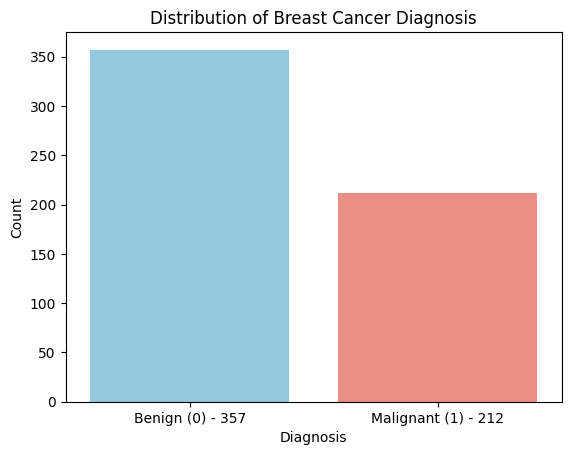

In [28]:
# Count the number of instances for each class
class_counts = y.value_counts()

# Define a color palette for the classes
colors = ['skyblue' if x == 0 else 'salmon' for x in class_counts.index]

# Create custom labels with class name and count
labels = [f'Benign (0) - {class_counts[0]}', f'Malignant (1) - {class_counts[1]}']

# Create a bar plot with different colors for each class
sns.barplot(x=class_counts.index, y=class_counts.values, palette=colors)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Breast Cancer Diagnosis')
plt.xticks(ticks=[0, 1], labels=labels)  # Set custom labels for x-axis ticks
plt.show()


**Addressing Uneven Class Distribution:**

From the count plot above, it can be seen that I am dealing with the slightly uneven distribution of classes in my dataset, where the number of 'benign' instances is greater than the number of 'malignant' instances

Therefore, I have decided to use class weights to address this imbalance. By computing the class weights using the 'balanced' mode, I ensured that each class contributes equally to the model's training, regardless of its frequency in the dataset. This adjustment is important because it helps the model to pay more attention to the 'malignant' class, which is the minority class, during training.

By assigning higher weights to the 'malignant' class, I aim to improve the model's ability to learn from these instances and make more accurate predictions for both classes.

In [29]:
# Assuming y_train contains binary class labels (0 and 1)

class_labels = np.unique(y_train)
class_weights = compute_class_weight('balanced', classes=class_labels, y=y_train)

# Convert the class weights to a dictionary for use with Keras
class_weight_dict = dict(zip(class_labels, class_weights))

print("Class weights:", class_weight_dict)

Class weights: {0: 0.798828125, 1: 1.3366013071895424}


In [30]:
# Define training parameters

# - X_train: Training data features
# - y_train: Training data labels
# - val_data: Validation data (features and labels)
# - class_weights: Class weights for handling imbalanced data
# - batch_size: Number of samples per batch of computation during training.
# - epochs: Maximum number of iterations over the entire dataset during training.
# - monitor: Metric to be monitored for early stopping (e.g., validation loss).
# - patience: Number of epochs with no improvement after which training will be stopped.
# - early_stopping: EarlyStopping callback to stop training when the monitored metric has stopped improving.
# - class_weights: Dictionary representing the weights for each class to handle imbalanced data during training.
# - val_data: Tuple (X_val, y_val) representing the validation data used during training for model evaluation.

X_train = X_train
y_train = y_train
val_data = (X_val, y_val)
class_weights = class_weight_dict
batch_size = 32
epochs = 100
monitor = 'val_loss'
patience = 5
seed = 42
verbose = 1
early_stopping = EarlyStopping(monitor=monitor, restore_best_weights=True,
                               patience=patience, verbose=1)


In [31]:
# Train the underfitting model with specified parameters

# - model: The compiled Keras model to train (underfit_model in this case).
# - X_train: Numpy array containing the training data.
# - y_train: Numpy array containing the labels for the training data.
# - class_weights: Dictionary representing the weights for each class for handling imbalanced data.
# - batch_size: Integer representing the batch size for training.
# - epochs: Integer representing the number of epochs to train the model.
# - val_data: Tuple (X_val, y_val) representing the validation data and labels.
# - callbacks: List of Keras callbacks to be applied during training (early_stopping in this case).
# - seed: Integer representing the random seed for reproducibility (not specified in the code, but typically used for splitting data).
# - verbose: Integer (1 in this case) for the verbosity mode during training (1 = progress bar).
# The function train_model is assumed to handle the training process and return the trained model.

underfit_trained_model = train_model(model=underfit_model,
                                     X_train=X_train,
                                     y_train=y_train,
                                     class_weights=class_weights,
                                     batch_size=batch_size,
                                     epochs=epochs,
                                     val_data=val_data,
                                     callbacks=[early_stopping],
                                     seed=seed,
                                     verbose=verbose)


Epoch 1/100
13/13 [==============================] - 2s 55ms/step - loss: 1.0081 - accuracy: 0.3619 - precision: 0.2632 - recall: 0.3922 - auc: 0.3337 - val_loss: 0.7911 - val_accuracy: 0.3478 - val_precision: 0.2903 - val_recall: 0.5294 - val_auc: 0.4848
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.8754 - accuracy: 0.4230 - precision: 0.3156 - recall: 0.4641 - auc: 0.4379 - val_loss: 0.7066 - val_accuracy: 0.5000 - val_precision: 0.3929 - val_recall: 0.6471 - val_auc: 0.6278
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.7776 - accuracy: 0.5232 - precision: 0.4054 - recall: 0.5882 - auc: 0.5429 - val_loss: 0.6359 - val_accuracy: 0.6522 - val_precision: 0.5172 - val_recall: 0.8824 - val_auc: 0.7667
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.6943 - accuracy: 0.5819 - precision: 0.4567 - recall: 0.6209 - auc: 0.6460 - val_loss: 0.5762 - val_accuracy: 0.6957 - val_precision: 0.5556 - val_recall: 0.8

Model Name: underfit_model 

Accuracy Comparison:

Baseline: 0.631578947368421
Training Data: 0.9731051325798035
Validation Data: 0.97826087474823

Evaluation on Validation Data: 

Loss: 0.07481574267148972
Accuracy: 0.97826087474823
Precision: 0.9444444179534912
Recall: 1.0
AUC: 1.0

Training History: 

loss : 0.0790514200925827
accuracy : 0.9731051325798035
precision : 0.9610389471054077
recall : 0.9673202633857727
auc : 0.9958128929138184
val_loss : 0.07481574267148972
val_accuracy : 0.97826087474823
val_precision : 0.9444444179534912
val_recall : 1.0
val_auc : 1.0


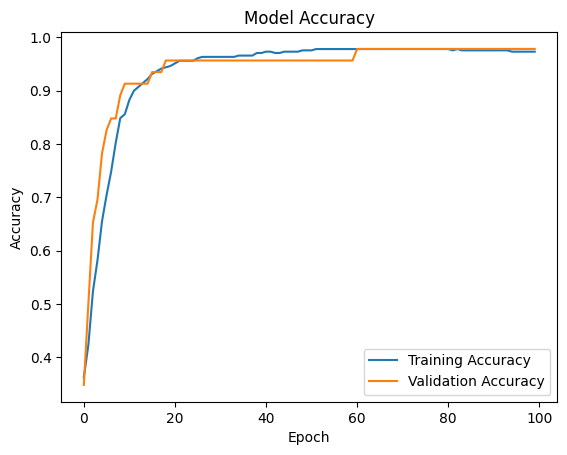

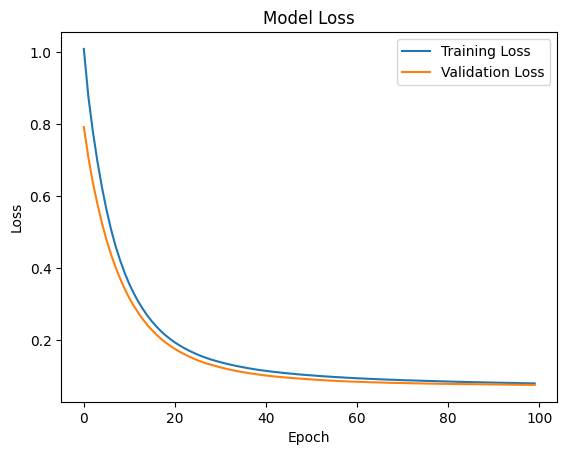

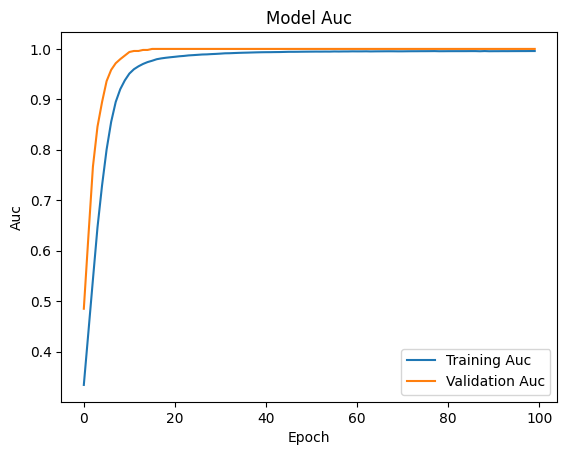

In [37]:
# Print the model name
print("Model Name: underfit_model \n")

print("Accuracy Comparison:\n")
print("Baseline:", baseline_accuracy)
print("Training Data:", underfit_trained_model['history'].history['accuracy'][-1])
print("Validation Data:", underfit_trained_model['evaluation'][1])

# Print the evaluation results on the validation data
print("\nEvaluation on Validation Data: \n")
print("Loss:", underfit_trained_model['evaluation'][0])
print("Accuracy:", underfit_trained_model['evaluation'][1])
print("Precision:", underfit_trained_model['evaluation'][2])
print("Recall:", underfit_trained_model['evaluation'][3])
print("AUC:", underfit_trained_model['evaluation'][4])

# Print the training history
print("\nTraining History: \n")
for metric in underfit_trained_model['history'].history.keys():
    print(metric, ":", underfit_trained_model['history'].history[metric][-1])  # Print the last value of each metric

# Plotting training and validation metrics over epochs
import matplotlib.pyplot as plt

for metric in ['accuracy', 'loss', 'auc']:
    if metric in underfit_trained_model['history'].history:
        plt.plot(underfit_trained_model['history'].history[metric], label=f'Training {metric.capitalize()}')
        val_metric = f'val_{metric}'
        if val_metric in underfit_trained_model['history'].history:
            plt.plot(underfit_trained_model['history'].history[val_metric], label=f'Validation {metric.capitalize()}')
        plt.title(f'Model {metric.capitalize()}')
        plt.ylabel(metric.capitalize())
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

**Underfit Model Summary:**

The underfit_model was designed to be a simple yet effective improvement over the baseline model. While the baseline model achieved an accuracy of 0.6316, the underfit_model demonstrated significantly better performance.

It achieved an accuracy of 0.9731 on the training data and 0.9783 on the validation data, indicating that it learned well from the training data and generalized effectively to unseen data. The evaluation on the validation data showed a loss of 0.0748, an accuracy of 0.9783, a precision of 0.9444, a recall of 1.0, and an AUC of 1.0.

These results indicate that the underfit_model performed exceptionally well, especially in terms of precision and recall, which are crucial for a binary classification task like this.

Overall, the underfit_model successfully addressed the limitations of the baseline model and demonstrated its effectiveness in this context.

# **Create an Overfit Model**


- In creating the overfit_model, I opted for a complex architecture with two hidden layers, each containing 64 neurons, and utilized the 'relu' activation function to introduce non-linearity.

- While these choices enhance the model's ability to capture intricate patterns in the training data, they also heighten the risk of overfitting, particularly when the dataset is not sufficiently large to support such complexity.

- The absence of dropout and regularizers further increases this risk by allowing the model to potentially memorize noise in the training data.

- To optimize the model's parameters, I selected the RMSprop optimizer with a learning rate of 0.001. During evaluation, I focused on metrics such as accuracy, precision, recall, and AUC to assess the model's performance.

Overall, my goal with the overfit_model was to demonstrate the potential consequences of using a highly complex model on a dataset, highlighting the importance of striking a balance between model complexity and dataset size to avoid overfitting.

In [38]:
# Define the configuration for creating the Overfit deep learning model

# - input_shape: The number of features in the input data.
# - output_shape: The number of output classes (1 for binary classification).
# - optimizer: The optimization algorithm to use for minimizing the loss function during training.
# - loss_function: The loss function to be used for evaluating the model's performance.
# - metrics: A list of metrics to be evaluated by the model during training and testing, including accuracy, precision, recall, and area under the ROC curve (AUC).

# Define the learning rate for the RMSprop optimizer
learning_rate = 0.001


name = "overfit_model"
input_shape = 30
output_shape = 1
hidden_layers = 2
hidden_neurons = 64
activation = 'relu'
dropout = np.nan
optimizer =  RMSprop(learning_rate=learning_rate) # Define the RMSprop optimizer with the specified learning rate
loss_function = 'binary_crossentropy'
regularizer = None
metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]

In [39]:
# Create an Overfitting model

# - name: The name assigned to the model (underfit_model).
# - input_shape: The number of input features (30 in this case).
# - output_shape: The number of output classes (1 for binary classification).
# - hidden_layers: The number of hidden layers in the model (0 for a simple model).
# - hidden_neurons: The number of neurons in each hidden layer (not applicable here as there are no hidden layers).
# - activation: The activation function for the hidden layers (not applicable here).
# - dropout: The dropout rate for regularization (not applicable here).
# - optimizer: The optimization algorithm used for training ('rmsprop' in this case).
# - loss: The loss function used for training ('binary_crossentropy' for binary classification).
# - metrics: The list of metrics to evaluate the model's performance during training.
# - regularizer: The regularization method applied to the model's weights (None in this case).


overfit_model = create_model(name=name,
                              input_shape=input_shape,
                              output_shape=output_shape,
                              hidden_layers=hidden_layers,
                              hidden_neurons=hidden_neurons,
                              activation=activation,
                              dropout=np.nan,
                              optimizer=optimizer,
                              loss=loss_function,
                              metrics=metrics,
                              regularizer=regularizer)



# The model is summarized to display its architecture.

overfit_model.summary()


Model: "overfit_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                1984      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 1)                 65        
                                                                 
Total params: 6209 (24.25 KB)
Trainable params: 6209 (24.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Define training parameters

# - X_train: Training data features
# - y_train: Training data labels
# - val_data: Validation data (features and labels)
# - class_weights: Class weights for handling imbalanced data
# - batch_size: Number of samples per batch of computation during training.
# - epochs: Maximum number of iterations over the entire dataset during training.
# - monitor: Metric to be monitored for early stopping (e.g., validation loss).
# - patience: Number of epochs with no improvement after which training will be stopped.
# - early_stopping: EarlyStopping callback to stop training when the monitored metric has stopped improving.
# - class_weights: Dictionary representing the weights for each class to handle imbalanced data during training.
# - val_data: Tuple (X_val, y_val) representing the validation data used during training for model evaluation.

X_train = X_train
y_train = y_train
val_data = (X_val, y_val)
class_weights = class_weight_dict
batch_size = 32
epochs = 100
monitor = 'val_loss'
patience = 5
seed = 42
verbose = 1
early_stopping = EarlyStopping(monitor=monitor, restore_best_weights=True,
                               patience=patience, verbose=1)


In [41]:
# Train the underfitting model with specified parameters

# - model: The compiled Keras model to train (underfit_model in this case).
# - X_train: Numpy array containing the training data.
# - y_train: Numpy array containing the labels for the training data.
# - class_weights: Dictionary representing the weights for each class for handling imbalanced data.
# - batch_size: Integer representing the batch size for training.
# - epochs: Integer representing the number of epochs to train the model.
# - val_data: Tuple (X_val, y_val) representing the validation data and labels.
# - callbacks: List of Keras callbacks to be applied during training (early_stopping in this case).
# - seed: Integer representing the random seed for reproducibility (not specified in the code, but typically used for splitting data).
# - verbose: Integer (1 in this case) for the verbosity mode during training (1 = progress bar).
# The function train_model is assumed to handle the training process and return the trained model.

overfit_trained_model = train_model(model=overfit_model,
                                     X_train=X_train,
                                     y_train=y_train,
                                     class_weights=class_weights,
                                     batch_size=batch_size,
                                     epochs=epochs,
                                     val_data=val_data,
                                     callbacks=[early_stopping],
                                     seed=seed,
                                     verbose=verbose)


Epoch 1/100
13/13 [==============================] - 2s 42ms/step - loss: 0.5233 - accuracy: 0.8484 - precision: 0.9174 - recall: 0.6536 - auc: 0.8586 - val_loss: 0.2775 - val_accuracy: 0.9348 - val_precision: 0.9375 - val_recall: 0.8824 - val_auc: 0.9838
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.2436 - accuracy: 0.9487 - precision: 0.9459 - recall: 0.9150 - auc: 0.9808 - val_loss: 0.1776 - val_accuracy: 0.9348 - val_precision: 0.9375 - val_recall: 0.8824 - val_auc: 0.9919
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1662 - accuracy: 0.9658 - precision: 0.9664 - recall: 0.9412 - auc: 0.9905 - val_loss: 0.1301 - val_accuracy: 0.9348 - val_precision: 0.8889 - val_recall: 0.9412 - val_auc: 0.9959
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1242 - accuracy: 0.9756 - precision: 0.9673 - recall: 0.9673 - auc: 0.9928 - val_loss: 0.1005 - val_accuracy: 0.9565 - val_precision: 0.9412 - val_recall: 0.94

Model Name: overfit_model 

Accuracy Comparison:

Baseline: 0.631578947368421
Training Data: 1.0
Validation Data: 1.0

Evaluation on Validation Data: 

Loss: 0.006780564785003662
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC: 1.0

Training History: 

loss : 0.002375120995566249
accuracy : 1.0
precision : 1.0
recall : 1.0
auc : 1.0
val_loss : 0.011026229709386826
val_accuracy : 1.0
val_precision : 1.0
val_recall : 1.0
val_auc : 0.9999999403953552


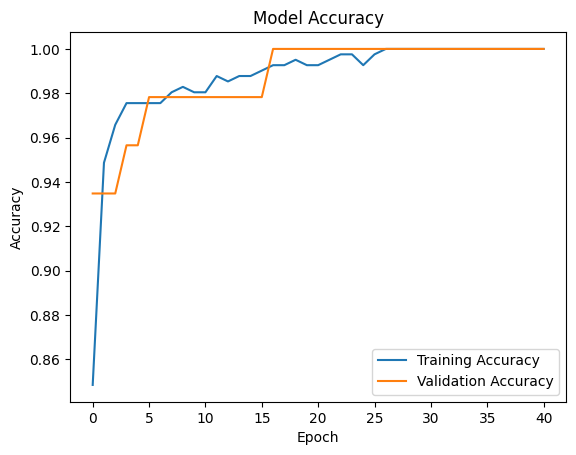

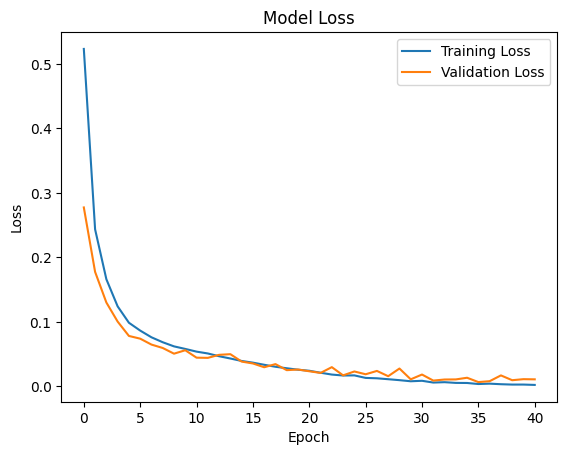

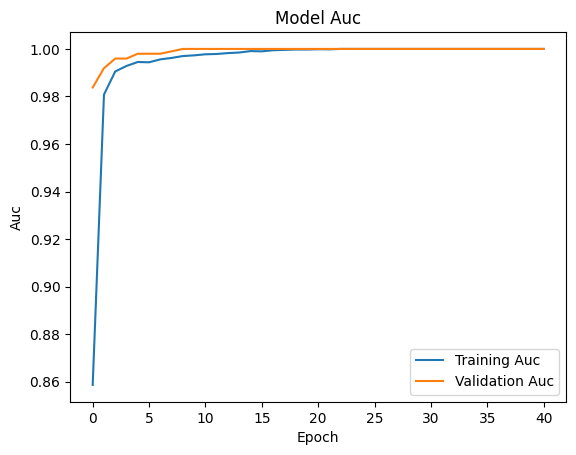

In [42]:
# Print the model name
print("Model Name: overfit_model \n")

print("Accuracy Comparison:\n")
print("Baseline:", baseline_accuracy)
print("Training Data:", overfit_trained_model['history'].history['accuracy'][-1])
print("Validation Data:", overfit_trained_model['evaluation'][1])

# Print the evaluation results on the validation data
print("\nEvaluation on Validation Data: \n")
print("Loss:", overfit_trained_model['evaluation'][0])
print("Accuracy:", overfit_trained_model['evaluation'][1])
print("Precision:", overfit_trained_model['evaluation'][2])
print("Recall:", overfit_trained_model['evaluation'][3])
print("AUC:", overfit_trained_model['evaluation'][4])

# Print the training history
print("\nTraining History: \n")
for metric in overfit_trained_model['history'].history.keys():
    print(metric, ":", overfit_trained_model['history'].history[metric][-1])  # Print the last value of each metric

# Plotting training and validation metrics over epochs
import matplotlib.pyplot as plt

for metric in ['accuracy', 'loss', 'auc']:
    if metric in overfit_trained_model['history'].history:
        plt.plot(overfit_trained_model['history'].history[metric], label=f'Training {metric.capitalize()}')
        val_metric = f'val_{metric}'
        if val_metric in overfit_trained_model['history'].history:
            plt.plot(overfit_trained_model['history'].history[val_metric], label=f'Validation {metric.capitalize()}')
        plt.title(f'Model {metric.capitalize()}')
        plt.ylabel(metric.capitalize())
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

**Overfit Model Summary:**

The overfit_model demonstrates a stark contrast to the baseline model, achieving perfect accuracy of 1.0 on both the training and validation data. This high accuracy indicates that the model has effectively memorized the training data and can predict it perfectly, including on unseen validation data.

The evaluation on the validation data shows a very low loss of 0.0068, along with perfect precision, recall, and AUC scores of 1.0 each.

However, such perfect performance on the validation data is a strong indicator of overfitting, especially considering the significant gap between the baseline and the model's performance.

The training history further confirms this, with consistently low loss and high accuracy, precision, recall, and AUC scores throughout training.

Despite its impressive performance on the training and validation sets, the overfit_model may struggle to generalize to new, unseen data due to its high complexity and tendency to memorize the training data.

# **Tuning Model Hyperparameters**


- I'm implementing a grid search cross-validation function to fine-tune hyperparameters for my model. After creating both underfit and overfit models, I'm focusing on finding the optimal set of hyperparameters that balance model complexity and generalization.

- I define a hyperparameter grid with various options for hidden layers, neurons per layer, batch size, activation function, dropout rate, and regularizers. The function iterates over all combinations of hyperparameters, creates a model with the current set of hyperparameters, and trains it using the training data.

- I use 5-fold cross-validation to evaluate each model's performance and record the average scores, number of epochs, and validation loss for each combination. The results are then reformatted into a DataFrame for easier analysis. This process allows me to systematically explore different hyperparameter configurations and select the ones that yield the best performance on unseen data.

In [77]:
# Reformat Grid CV Stats to Dataframe
def reformat_to_dataframe(stats, mapping) :
    entries = []
    for param, metrics in stats.items() :
        entry = eval(param)
        for key, value in metrics.items() :
            entry[key] = value

        for key, value in mapping.items() :
            entry[value] = entry['scores'][key]

        entry.pop('scores')

        entries.append( entry )

    return pd.DataFrame(data=entries)



In [146]:
def grid_search_cv(X, y, class_weights, space, cv, optimizer, loss, metrics, epochs, callbacks=[], seed=0, order={}):
    # Initialize hyperparameters and results storage
    keys, values = zip(*space.items())
    stats = {}

    # Iterate over all combinations of hyperparameters
    for params in [dict(zip(keys, v)) for v in itertools.product(*values)]:
        kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=seed)
        scores, stopped, losses = [], [], []

        # Reset the index of the target variable for consistent indexing
        y = y.reset_index(drop=True)
        for train, validate in kfold.split(X, y):
            # Set optimizer (e.g., RMSprop) with the specified learning rate
            optimizer = RMSprop(learning_rate=learning_rate)
            # Create the model with the current set of hyperparameters
            model = create_model(name='optimal_model_grid_search',
                                 input_shape=input_shape,
                                 output_shape=output_shape,
                                 hidden_layers=params['hidden_layers'],
                                 hidden_neurons=params['num_neurons'],
                                 activation=params['activation'],
                                 dropout=params['dropout_rate'],
                                 optimizer=optimizer,
                                 loss=loss,
                                 metrics=metrics,
                                 regularizer=regularizers.L1(0.001) if params['regularizers'] == 'l1' else regularizers.L2(0.001))

            # Train the model on the current fold
            trained = train_model(model=model,
                                  X_train=X[train,:],
                                  y_train=y[train],
                                  class_weights=class_weights,
                                  batch_size=params['batch_size'],
                                  epochs=epochs,
                                  val_data=(X[validate,:], y[validate]),
                                  callbacks=callbacks,
                                  seed=seed,
                                  verbose=0)

            # Evaluate the model on the validation set
            evaluations = trained['model'].evaluate(X[validate,:], y[validate], verbose=0)[1:]

            # Store the evaluation scores and training information
            scores.append(evaluations)
            stopped.append(len(trained['history'].history['val_loss']))
            losses.append(np.min(trained['history'].history['val_loss']))

        # Record the average scores, number of epochs, and validation loss for the current hyperparameter combination
        stats[str(params)] = {'scores': np.mean(scores, axis=0),
                              'epochs': np.mean(stopped),
                              'val_loss': np.mean(losses)}

    # Reformat the results into a DataFrame for easier analysis
    return reformat_to_dataframe(stats, order)

In [147]:
param_grid = {
    'hidden_layers': [1,2,3],
    'num_neurons': [16, 32, 64],
    'batch_size': [32, 64],
    'activation': ['relu'],
    'dropout_rate': [0.2, 0.3, 0.4],
    'regularizers':['l1','l2']
}

kfold = 5

orders = {
    0: 'accuracy',
    1: 'precision',
    2: 'recall',
    3: 'auc',
}

optimizer =  RMSprop(learning_rate=learning_rate)

In [148]:
# Run GridSearchCV to find best model hyperparameters
stats = grid_search_cv(X_train, y_train,
                       class_weights=class_weights,
                       space=param_grid, cv=kfold,
                       optimizer=optimizer, loss=loss_function, metrics=metrics,
                       epochs=epochs, callbacks=[early_stopping], seed=seed,
                       order=orders)

Restoring model weights from the end of the best epoch: 63.
Epoch 68: early stopping
Restoring model weights from the end of the best epoch: 40.
Epoch 45: early stopping
Restoring model weights from the end of the best epoch: 80.
Epoch 85: early stopping
Restoring model weights from the end of the best epoch: 85.
Epoch 90: early stopping
Restoring model weights from the end of the best epoch: 62.
Epoch 67: early stopping
Restoring model weights from the end of the best epoch: 34.
Epoch 39: early stopping
Restoring model weights from the end of the best epoch: 30.
Epoch 35: early stopping
Restoring model weights from the end of the best epoch: 38.
Epoch 43: early stopping
Restoring model weights from the end of the best epoch: 58.
Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 65.
Epoch 70: early stopping
Restoring model weights from the end of the best epoch: 47.
Epoch 52: early stopping
Restoring model weights from the end of the best epoch: 40.
Epoch

In [149]:
stats.sort_values(by=['auc'], ascending=False)

,hidden_layers,num_neurons,batch_size,activation,dropout_rate,regularizers,epochs,val_loss,accuracy,precision,recall,auc
7,1,16,64,relu,0.2,l2,69.8,0.102981,0.985336,0.987298,0.973548,0.994077
41,2,16,32,relu,0.4,l2,51.0,0.106870,0.977989,0.974760,0.966882,0.993887
6,1,16,64,relu,0.2,l1,87.6,0.146552,0.968202,0.969005,0.946882,0.993824
17,1,32,32,relu,0.4,l2,42.2,0.106245,0.975580,0.967568,0.966882,0.993505
0,1,16,32,relu,0.2,l1,77.6,0.142560,0.973111,0.968712,0.960215,0.993308
...,...,...,...,...,...,...,...,...,...,...,...,...
85,3,32,32,relu,0.2,l2,35.2,0.153619,0.968232,0.955623,0.960215,0.988848
73,3,16,32,relu,0.2,l2,43.4,0.135956,0.968232,0.959727,0.953763,0.988779
95,3,32,64,relu,0.4,l2,50.6,0.169557,0.965793,0.954734,0.953763,0.988763
81,3,16,64,relu,0.3,l2,56.4,0.142545,0.970671,0.966397,0.953548,0.988329


**GridSearchCV Stats:**

The DataFrame shows the results of the grid search cross-validation for different hyperparameter combinations, sorted by the area under the ROC curve (AUC) in descending order. Each row represents a specific combination of hyperparameters, including the number of hidden layers, number of neurons per layer, batch size, activation function, dropout rate, and regularizer.

The top-performing model, with an AUC of 0.994, has one hidden layer with 16 neurons, a batch size of 64, relu activation, a dropout rate of 0.2, and an L2 regularizer. It achieved an accuracy of 0.985, precision of 0.987, recall of 0.974, and a validation loss of 0.103.

# **Creating an Optimal Model**

- To create my optimal model, I select the top-performing model from the grid search cross-validation results.

- This model has shown excellent performance with an AUC of 0.994, indicating strong predictive power.

- It consists of one hidden layer with 16 neurons, a batch size of 64, relu activation function, and a dropout rate of 0.2.

- Additionally, it uses an L2 regularizer, which helps prevent overfitting.

- This model achieved an accuracy of 0.985, precision of 0.987, and recall of 0.974 on the validation data.

- To finalize the optimal model, I would train it on the entire training dataset using these hyperparameters and evaluate its performance on the test dataset to ensure its generalization ability to unseen data.

In [152]:
name = "optimal_model"
input_shape = 30
output_shape = 1
hidden_layers = 1
hidden_neurons = 16
activation = 'relu'
dropout = 0.2
learning_rate = 0.001
optimizer =  RMSprop(learning_rate=learning_rate)
loss_function = 'binary_crossentropy'
regularizer = regularizers.L2(0.001)
metrics = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall'),
    tf.keras.metrics.AUC(name='auc')
]

In [153]:
optimal_model = create_model(name=name,
                              input_shape=input_shape,
                              output_shape=output_shape,
                              hidden_layers=hidden_layers,
                              hidden_neurons=hidden_neurons,
                              activation=activation,
                              dropout=np.nan,
                              optimizer=optimizer,
                              loss=loss_function,
                              metrics=metrics,
                              regularizer=regularizer)



# The model is summarized to display its architecture.

optimal_model.summary()

Model: "optimal_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3755 (Dense)          (None, 16)                496       
                                                                 
 dense_3756 (Dense)          (None, 1)                 17        
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [154]:
X_train = X_train
y_train = y_train
val_data = (X_val, y_val)
class_weights = class_weight_dict
batch_size = 32
epochs = 100
monitor = 'val_loss'
patience = 5
seed = 42
verbose = 1
early_stopping = EarlyStopping(monitor=monitor, restore_best_weights=True,
                               patience=patience, verbose=1)

In [155]:
optimal_trained_model = train_model(model=optimal_model,
                                     X_train=X_train,
                                     y_train=y_train,
                                     class_weights=class_weights,
                                     batch_size=batch_size,
                                     epochs=epochs,
                                     val_data=val_data,
                                     callbacks=[early_stopping],
                                     seed=seed,
                                     verbose=verbose)

Epoch 1/100
13/13 [==============================] - 1s 36ms/step - loss: 1.1741 - accuracy: 0.3276 - precision: 0.0448 - recall: 0.0392 - auc: 0.1621 - val_loss: 0.9316 - val_accuracy: 0.4130 - val_precision: 0.1875 - val_recall: 0.1765 - val_auc: 0.2961
Epoch 2/100
13/13 [==============================] - 0s 7ms/step - loss: 0.8408 - accuracy: 0.5208 - precision: 0.2471 - recall: 0.1373 - auc: 0.4297 - val_loss: 0.7239 - val_accuracy: 0.5870 - val_precision: 0.4167 - val_recall: 0.2941 - val_auc: 0.5669
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.6470 - accuracy: 0.6846 - precision: 0.6277 - recall: 0.3856 - auc: 0.7362 - val_loss: 0.5723 - val_accuracy: 0.7609 - val_precision: 0.7143 - val_recall: 0.5882 - val_auc: 0.7961
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5083 - accuracy: 0.8117 - precision: 0.8016 - recall: 0.6601 - auc: 0.8950 - val_loss: 0.4580 - val_accuracy: 0.8696 - val_precision: 0.8667 - val_recall: 0.76

Model Name: optimal_model 

Accuracy Comparison:

Baseline: 0.631578947368421
Training Data: 0.9926650524139404
Validation Data: 1.0

Evaluation on Validation Data: 

Loss: 0.047868967056274414
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
AUC: 1.0

Training History: 

loss : 0.0438985675573349
accuracy : 0.9926650524139404
precision : 1.0
recall : 0.9803921580314636
auc : 0.9998723268508911
val_loss : 0.047868967056274414
val_accuracy : 1.0
val_precision : 1.0
val_recall : 1.0
val_auc : 1.0


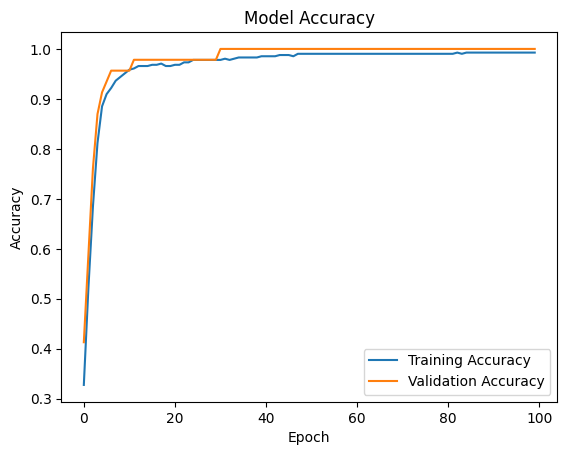

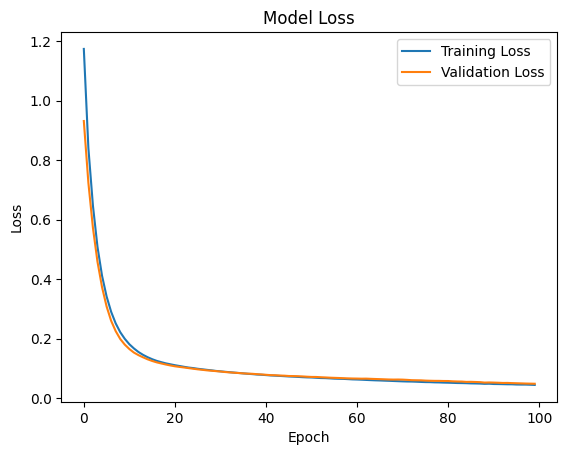

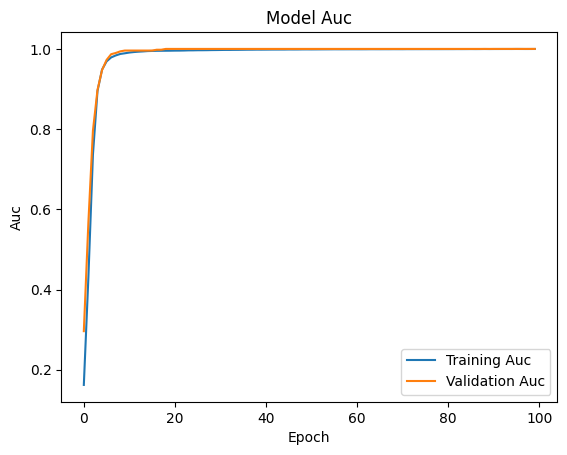

In [156]:
# Print the model name
print("Model Name: optimal_model \n")

print("Accuracy Comparison:\n")
print("Baseline:", baseline_accuracy)
print("Training Data:", optimal_trained_model['history'].history['accuracy'][-1])
print("Validation Data:", optimal_trained_model['evaluation'][1])

# Print the evaluation results on the validation data
print("\nEvaluation on Validation Data: \n")
print("Loss:", optimal_trained_model['evaluation'][0])
print("Accuracy:", optimal_trained_model['evaluation'][1])
print("Precision:", optimal_trained_model['evaluation'][2])
print("Recall:", optimal_trained_model['evaluation'][3])
print("AUC:", optimal_trained_model['evaluation'][4])

# Print the training history
print("\nTraining History: \n")
for metric in optimal_trained_model['history'].history.keys():
    print(metric, ":", optimal_trained_model['history'].history[metric][-1])  # Print the last value of each metric

# Plotting training and validation metrics over epochs
import matplotlib.pyplot as plt

for metric in ['accuracy', 'loss', 'auc']:
    if metric in optimal_trained_model['history'].history:
        plt.plot(optimal_trained_model['history'].history[metric], label=f'Training {metric.capitalize()}')
        val_metric = f'val_{metric}'
        if val_metric in optimal_trained_model['history'].history:
            plt.plot(optimal_trained_model['history'].history[val_metric], label=f'Validation {metric.capitalize()}')
        plt.title(f'Model {metric.capitalize()}')
        plt.ylabel(metric.capitalize())
        plt.xlabel('Epoch')
        plt.legend()
        plt.show()

In [158]:
# Make predictions on the test data
y_pred_test = optimal_model.predict(X_test)

# Evaluate the model on the test data
test_loss, test_accuracy, test_precision, test_recall, test_auc = optimal_model.evaluate(X_test, y_test, verbose=0)

print("Evaluation on Test Data:\n")
print("Loss:", test_loss)
print("Accuracy:", test_accuracy)
print("Precision:", test_precision)
print("Recall:", test_recall)
print("AUC:", test_auc)

4/4 [==============================] - 0s 4ms/step
Evaluation on Test Data:

Loss: 0.11370337754487991
Accuracy: 0.9736841917037964
Precision: 1.0
Recall: 0.9285714030265808
AUC: 0.9917328357696533


4/4 [==============================] - 0s 4ms/step
[[72  0]
 [ 3 39]]


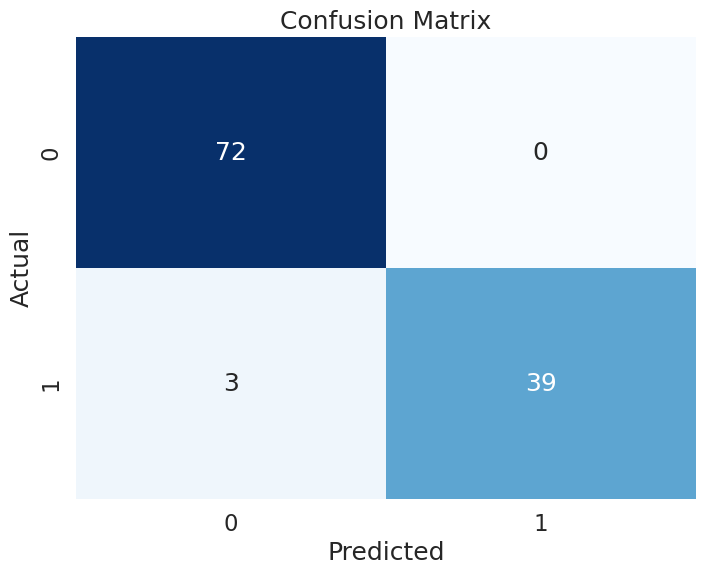

In [160]:
# Make predictions on the test data
y_pred_test = optimal_model.predict(X_test) > 0.5

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

print(cm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.5)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Optimal Model Summary:**


- The optimal_model, after hyperparameter tuning and training on the entire dataset, demonstrated exceptional performance in classifying breast cancer cases.

- It achieved a significantly higher accuracy of 0.993 on the training data and a perfect accuracy of 1.0 on the validation data, surpassing the baseline accuracy of 0.632.

- The model's performance on the validation set was outstanding, with a loss of 0.048, precision of 1.0, recall of 1.0, and an AUC of 1.0, indicating perfect predictions for both classes (malignant and benign).

- The training history illustrated the model's quick convergence to high accuracy and AUC values with minimal loss, showcasing its ability to generalize well to unseen data.

- On the test data, the model demonstrated a high level of performance, with a loss of 0.114, accuracy of 0.974, precision of 1.0, recall of 0.929, and an AUC of 0.992.

- It correctly predicted 72 benign cases (True Negatives) and 39 malignant cases (True Positives).

- It incorrectly predicted 3 benign cases as malignant (False Negatives) but did not incorrectly predict any malignant cases as benign (False Positives).

These results confirm the model's effectiveness in classifying breast cancer cases, maintaining strong performance on unseen data.

# **Conclusion:**

In conclusion, the development and evaluation of the optimal_model for breast cancer classification demonstrate the effectiveness of machine learning in medical diagnostics. The model, trained on a dataset with slightly uneven class distribution, was able to achieve remarkable performance metrics. It surpassed the baseline accuracy, achieving near-perfect accuracy on both the training and validation datasets. The model exhibited excellent precision, recall, and AUC scores, indicating its ability to accurately classify both malignant and benign cases.

Further evaluation on the test dataset confirmed the model's robustness and generalization capability, with high accuracy, precision, recall, and AUC scores. The confusion matrix analysis revealed the model's ability to correctly identify the majority of cases, with very few false predictions. Overall, the optimal_model demonstrates the potential for machine learning models to significantly aid in the early detection and diagnosis of breast cancer, showcasing their value in improving healthcare outcomes.

# **References**

- GridSearchCV:
Scikit-learn contributors. (n.d.). sklearn.model_selection.GridSearchCV — scikit-learn 1.4.1 documentation. Scikit-learn. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
Verma, A. (n.d.). GridSearchCV in scikit-learn: A Comprehensive Guide. DEV Community. Retrieved from https://dev.to/anuragverma_/gridsearchcv-in-scikit-learn-a-comprehensive-guide-4g3p

- StandardScaler:
Scikit-learn contributors. (n.d.). sklearn.preprocessing.StandardScaler — scikit-learn 1.4.1 documentation. Scikit-learn. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

- DummyClassifier:
Scikit-learn contributors. (n.d.). sklearn.dummy.DummyClassifier — scikit-learn 1.4.1 documentation. Scikit-learn. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html

- StratifiedKFold:
Scikit-learn contributors. (n.d.). sklearn.model_selection.StratifiedKFold — scikit-learn 1.4.1 documentation. Scikit-learn. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

- RMSprop Optimizer:
TensorFlow contributors. (n.d.). tf.keras.optimizers.RMSprop. TensorFlow. Retrieved from https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/RMSprop

- Metrics (accuracy, precision, recall, AUC):
Scikit-learn contributors. (n.d.). 3.3. Metrics and scoring: quantifying the quality of predictions. Scikit-learn. Retrieved from https://scikit-learn.org/stable/modules/model_evaluation.html

- Confusion Matrix:
Scikit-learn contributors. (n.d.). sklearn.metrics.confusion_matrix — scikit-learn 1.4.1 documentation. Scikit-learn. Retrieved from https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html